In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline   
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import pickle

In [2]:
df = pd.read_excel(r'C:\Users\91969\OneDrive\Desktop\predicted_price.xlsx')
df.head()

,Car_Name,Present_price,sp,Distance_kms,Type_Fuel,Year,Selling_type,Transmisson,Owner
0,ciaz,2.55,2.59,25547,petrol,2015,dealer,manual,0
1,swift,1.36,4.36,1455,petrol,2014,dealer,manual,0
2,vitaraviza,5.50,1.69,1555,diesel,2015,dealer,manual,0
3,alto,4.90,3.58,12577,petrol,2016,dealer,manual,0
4,nano,5.40,3.60,26589,diesel,2016,dealer,manual,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       17 non-null     object 
 1   Present_price  17 non-null     float64
 2   sp             17 non-null     float64
 3   Distance_kms   17 non-null     int64  
 4   Type_Fuel      17 non-null     object 
 5   Year           17 non-null     int64  
 6   Selling_type   17 non-null     object 
 7   Transmisson    17 non-null     object 
 8   Owner          17 non-null     int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 1.3+ KB


In [4]:
df.shape

(17, 9)

In [5]:
df.isnull().sum()

Car_Name         0
Present_price    0
sp               0
Distance_kms     0
Type_Fuel        0
Year             0
Selling_type     0
Transmisson      0
Owner            0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.describe()

,Present_price,sp,Distance_kms,Year,Owner
count,17.000000,17.000000,17.000000,17.000000,17.0
mean,4.012353,4.129412,8917.647059,2016.000000,0.0
std,2.245066,1.981289,8839.416468,3.201562,0.0
min,1.360000,1.300000,226.000000,2010.000000,0.0
25%,2.550000,2.600000,1555.000000,2015.000000,0.0
50%,2.880000,3.600000,4155.000000,2016.000000,0.0
75%,5.500000,4.700000,15478.000000,2018.000000,0.0
max,9.100000,8.550000,26589.000000,2024.000000,0.0


In [10]:
df.head()

,Car_Name,Present_price,sp,Distance_kms,Type_Fuel,Year,Selling_type,Transmisson,Owner
0,ciaz,2.55,2.59,25547,petrol,2015,dealer,manual,0
1,swift,1.36,4.36,1455,petrol,2014,dealer,manual,0
2,vitaraviza,5.50,1.69,1555,diesel,2015,dealer,manual,0
3,alto,4.90,3.58,12577,petrol,2016,dealer,manual,0
4,nano,5.40,3.60,26589,diesel,2016,dealer,manual,0


<Axes: >

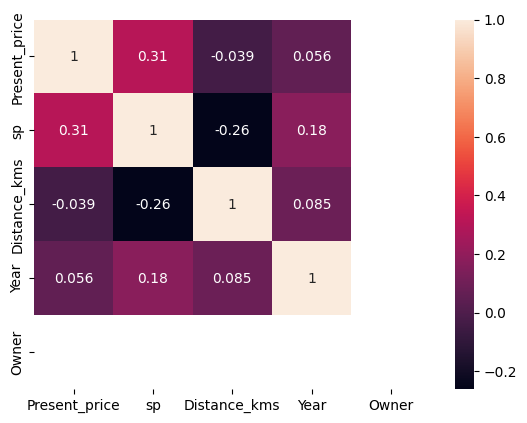

In [12]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

sns.heatmap(df[numerical_cols].corr(), annot=True)

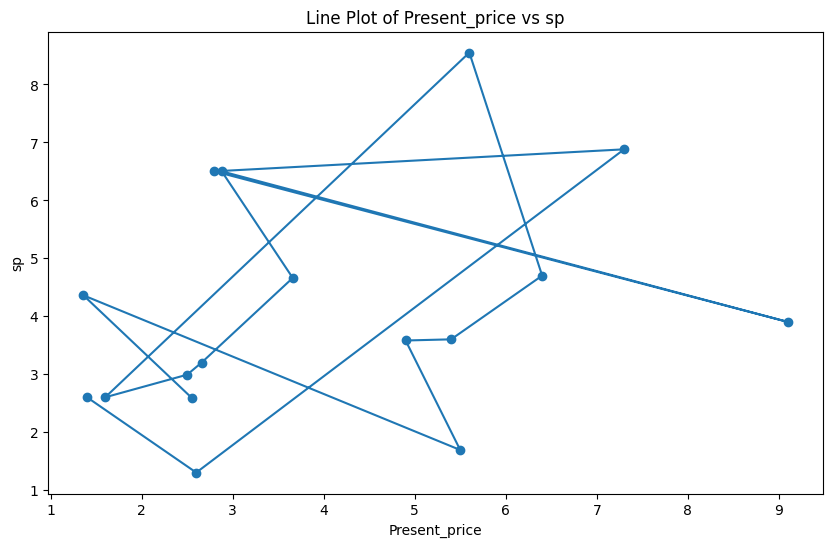

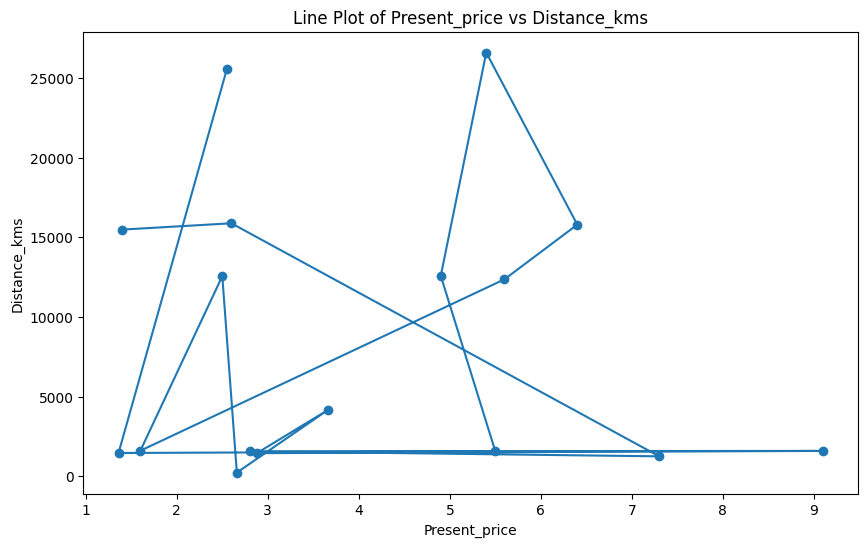

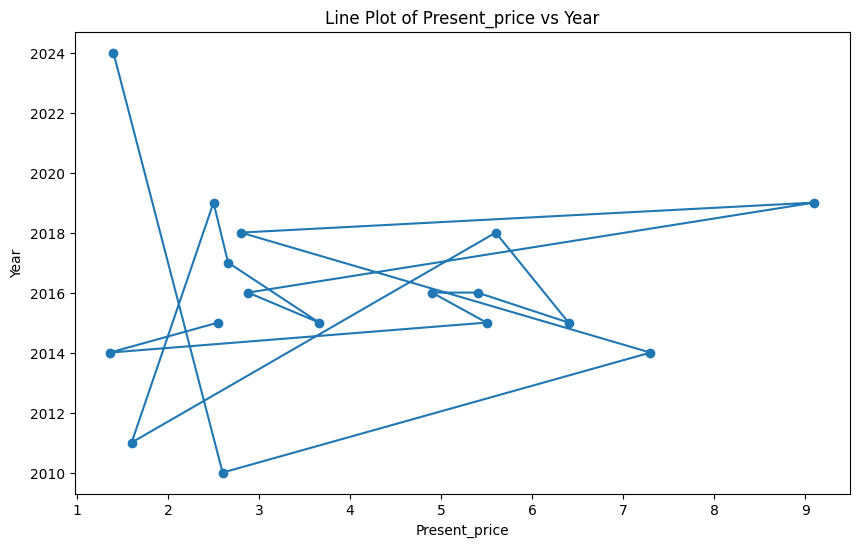

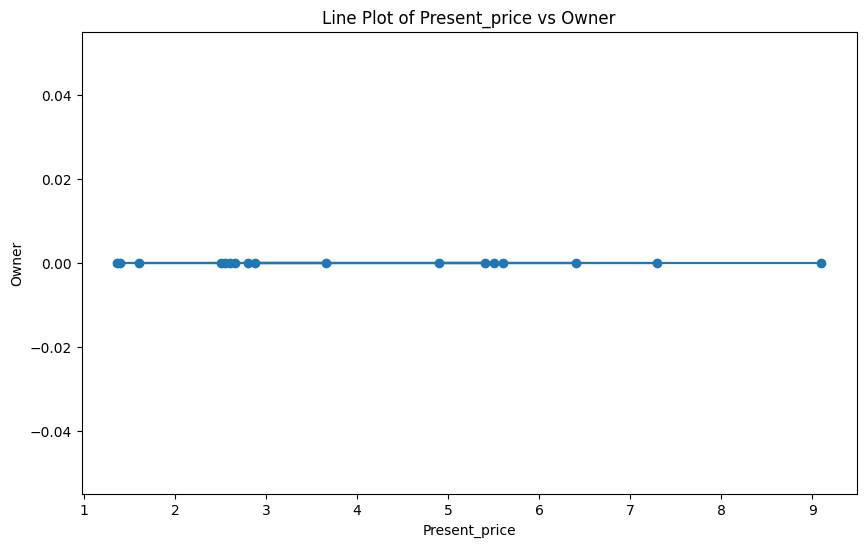

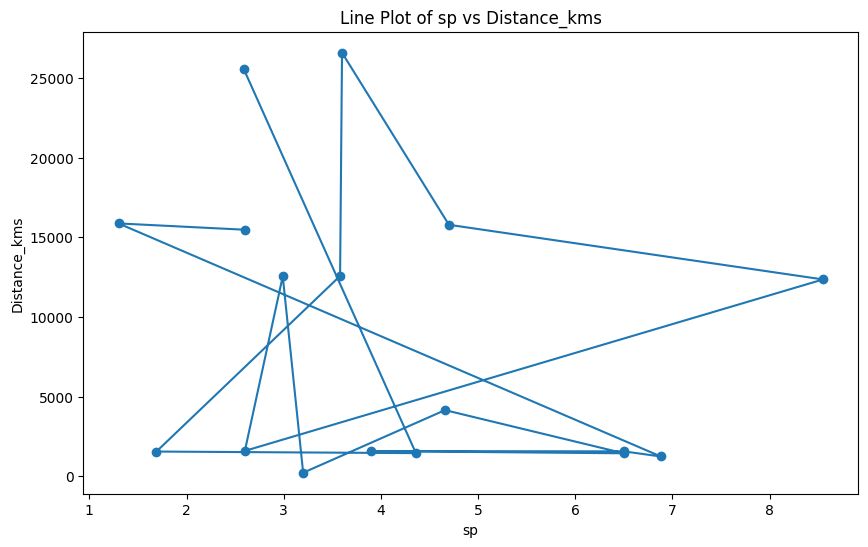

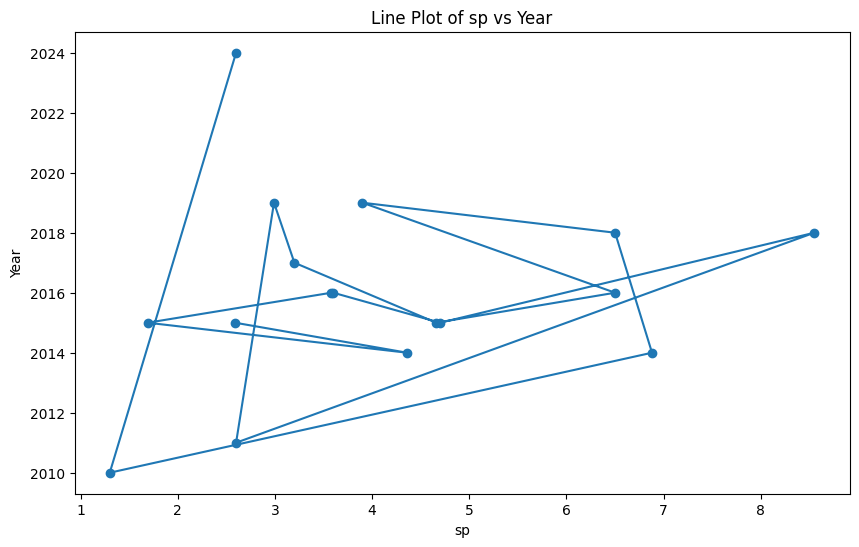

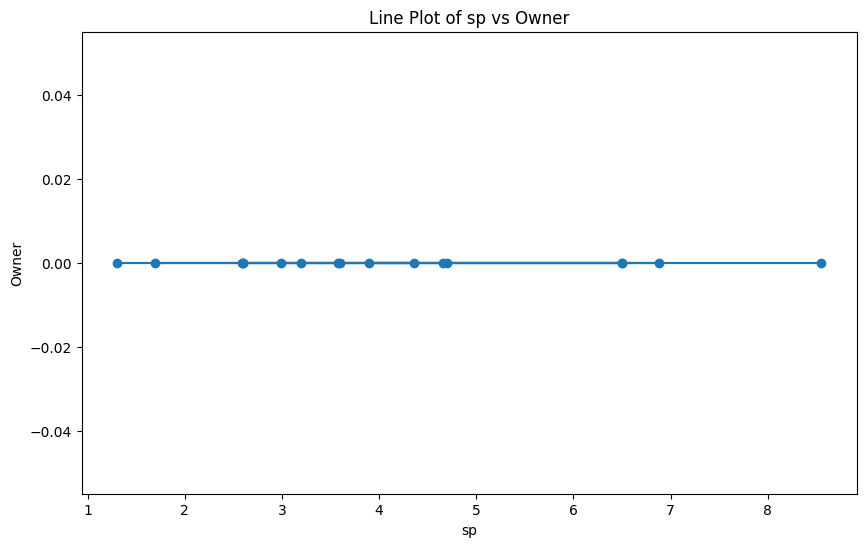

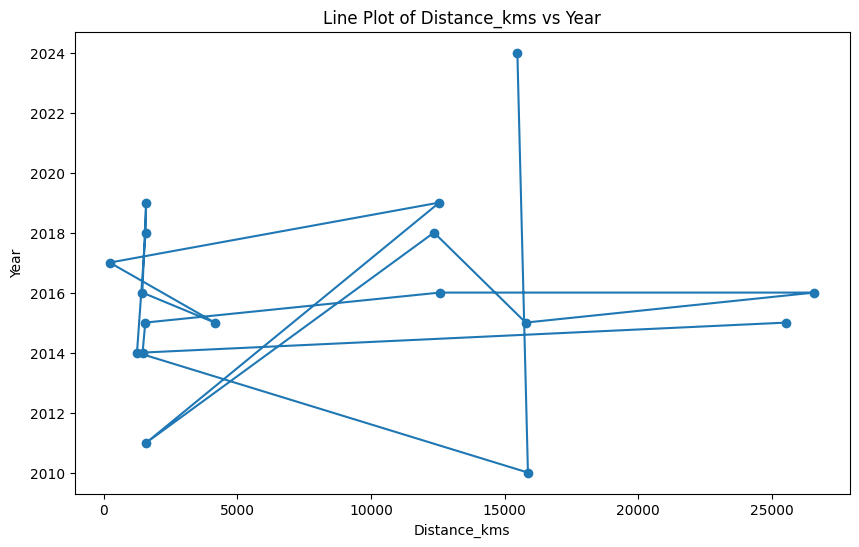

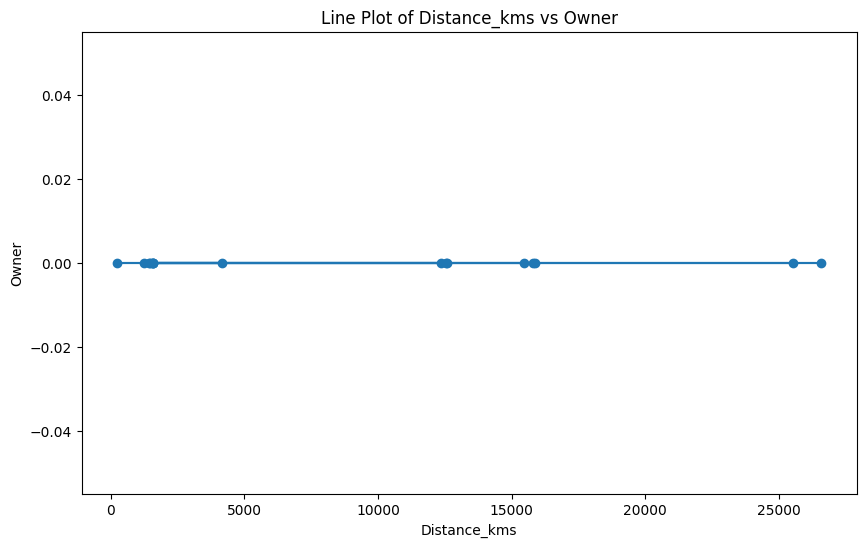

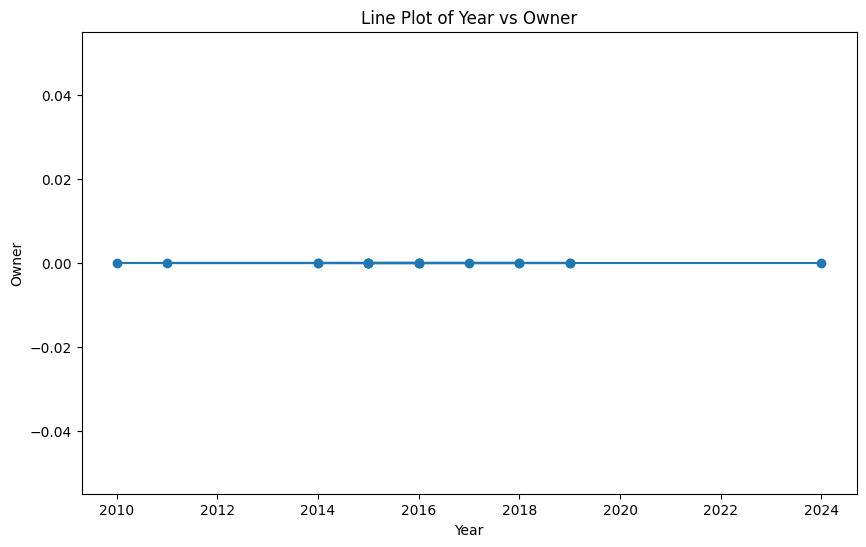

In [13]:
for i, col_x in enumerate(numerical_cols):
    for col_y in numerical_cols[i+1:]:
        plt.figure(figsize=(10, 6))
        plt.plot(df[col_x], df[col_y], marker='o')
        plt.xlabel(col_x)
        plt.ylabel(col_y)
        plt.title(f'Line Plot of {col_x} vs {col_y}')
        plt.show()

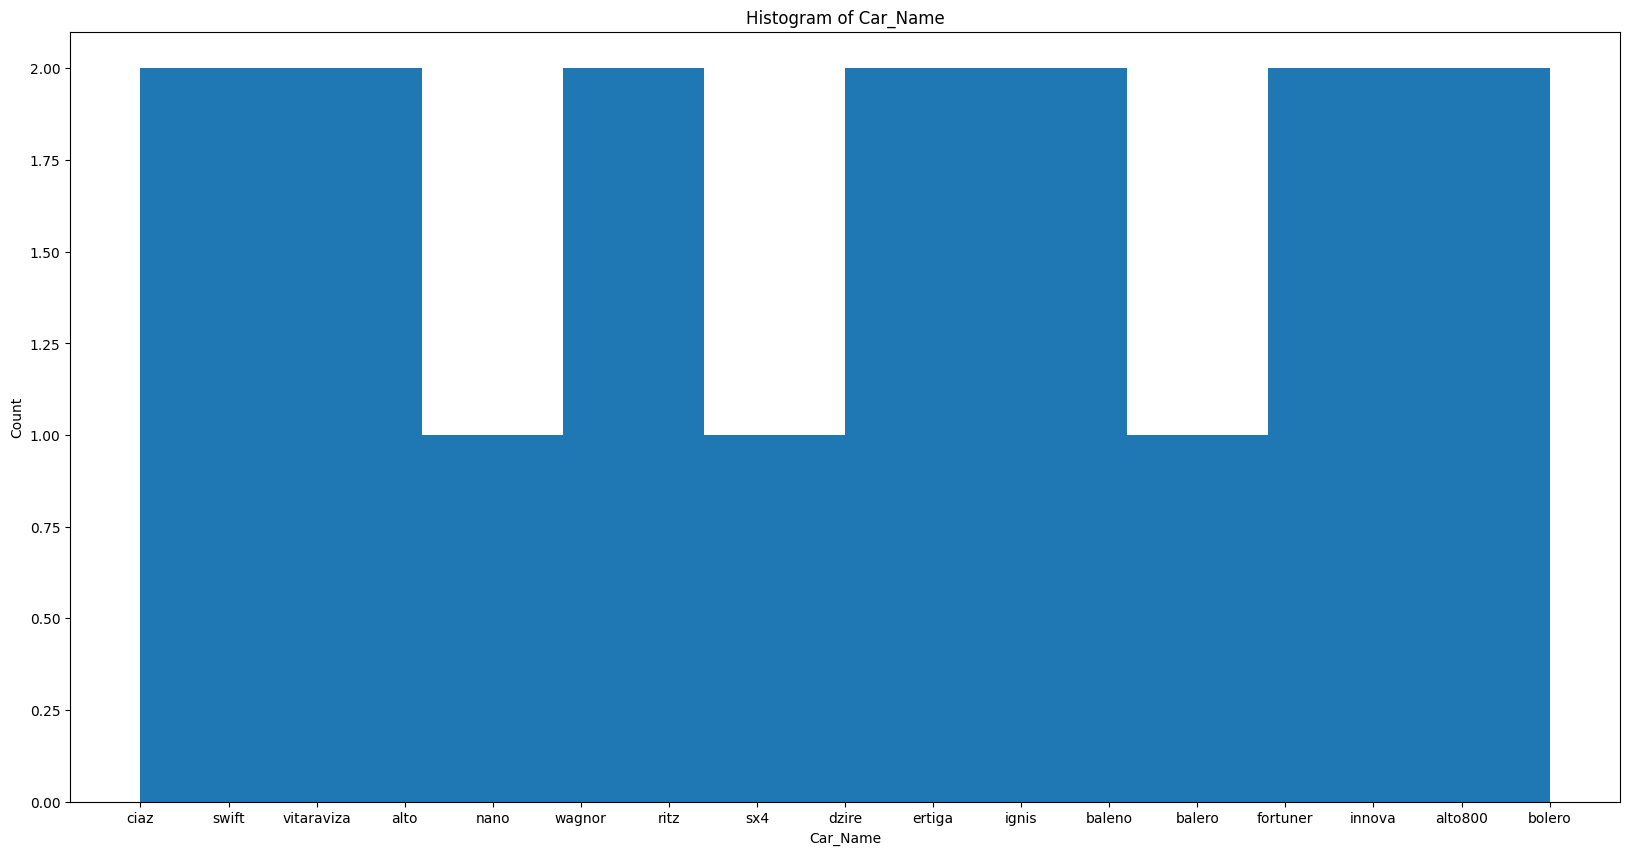

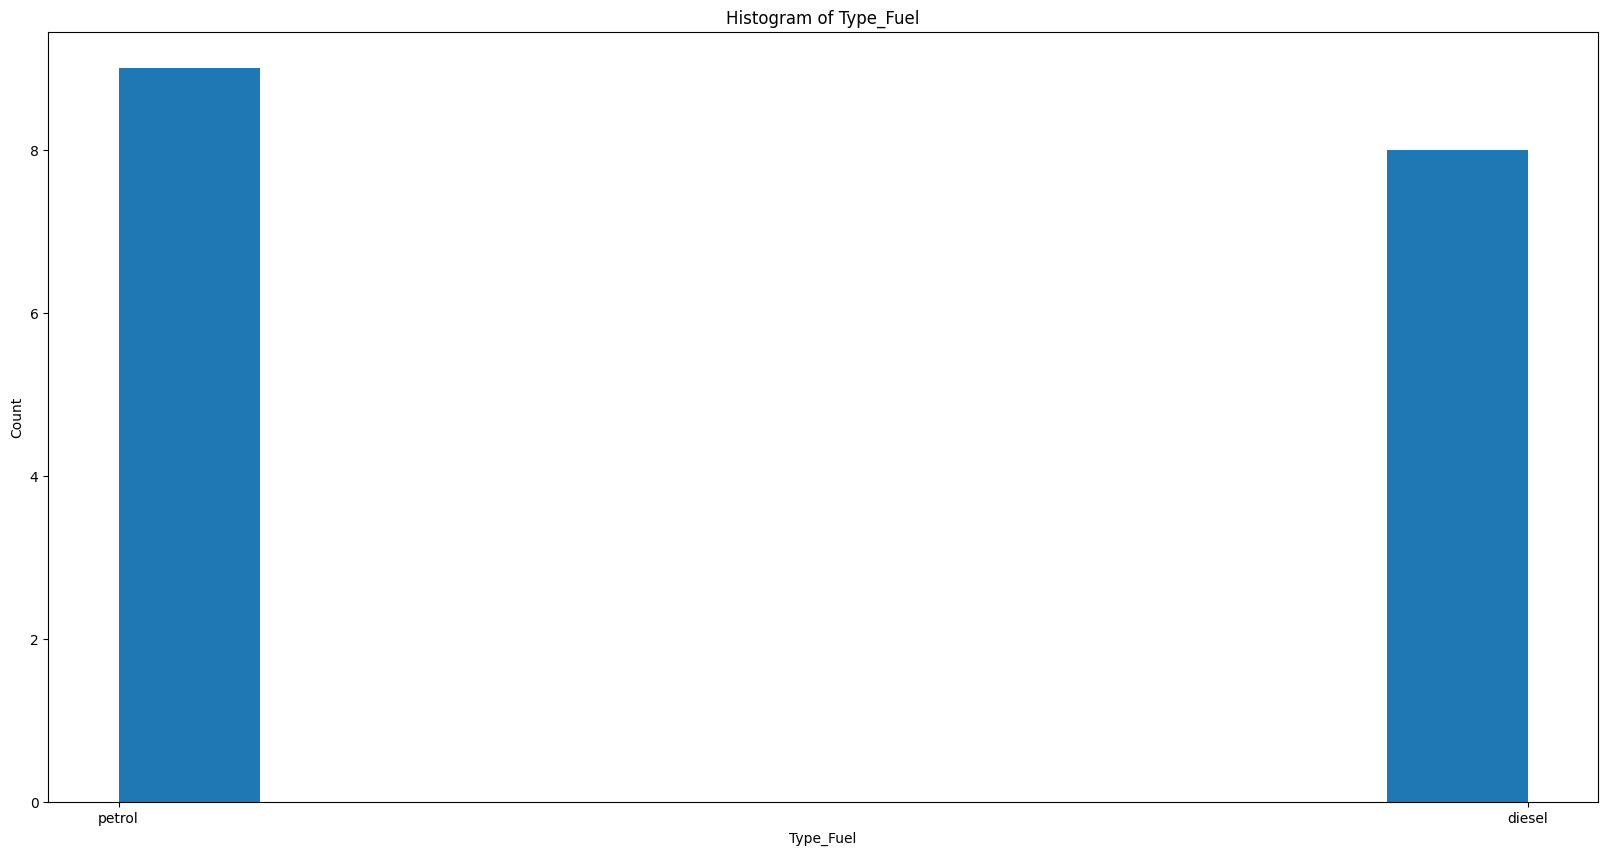

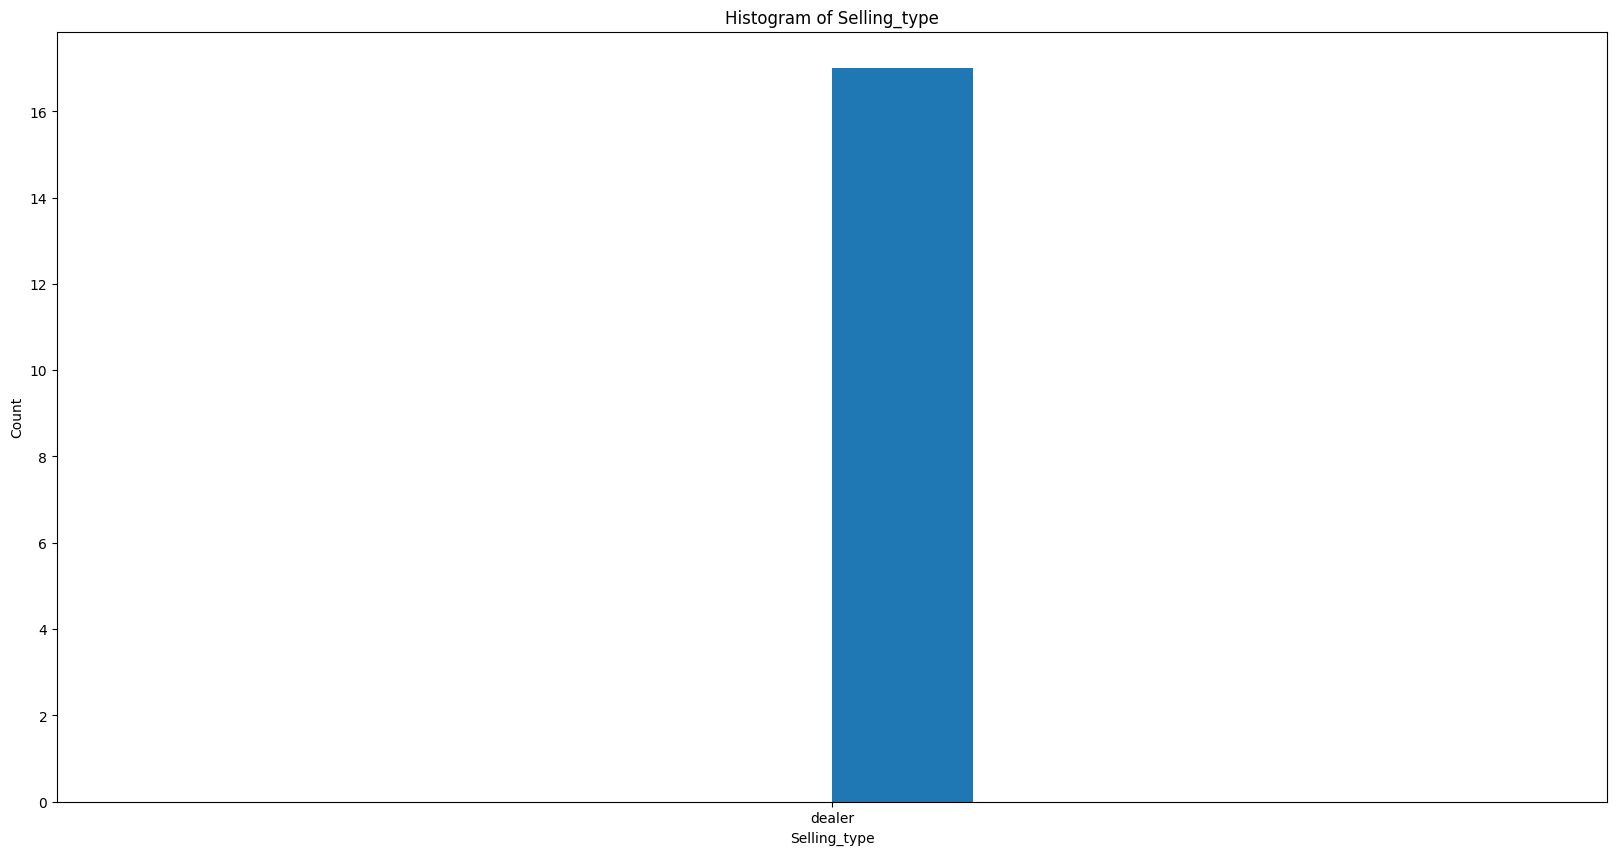

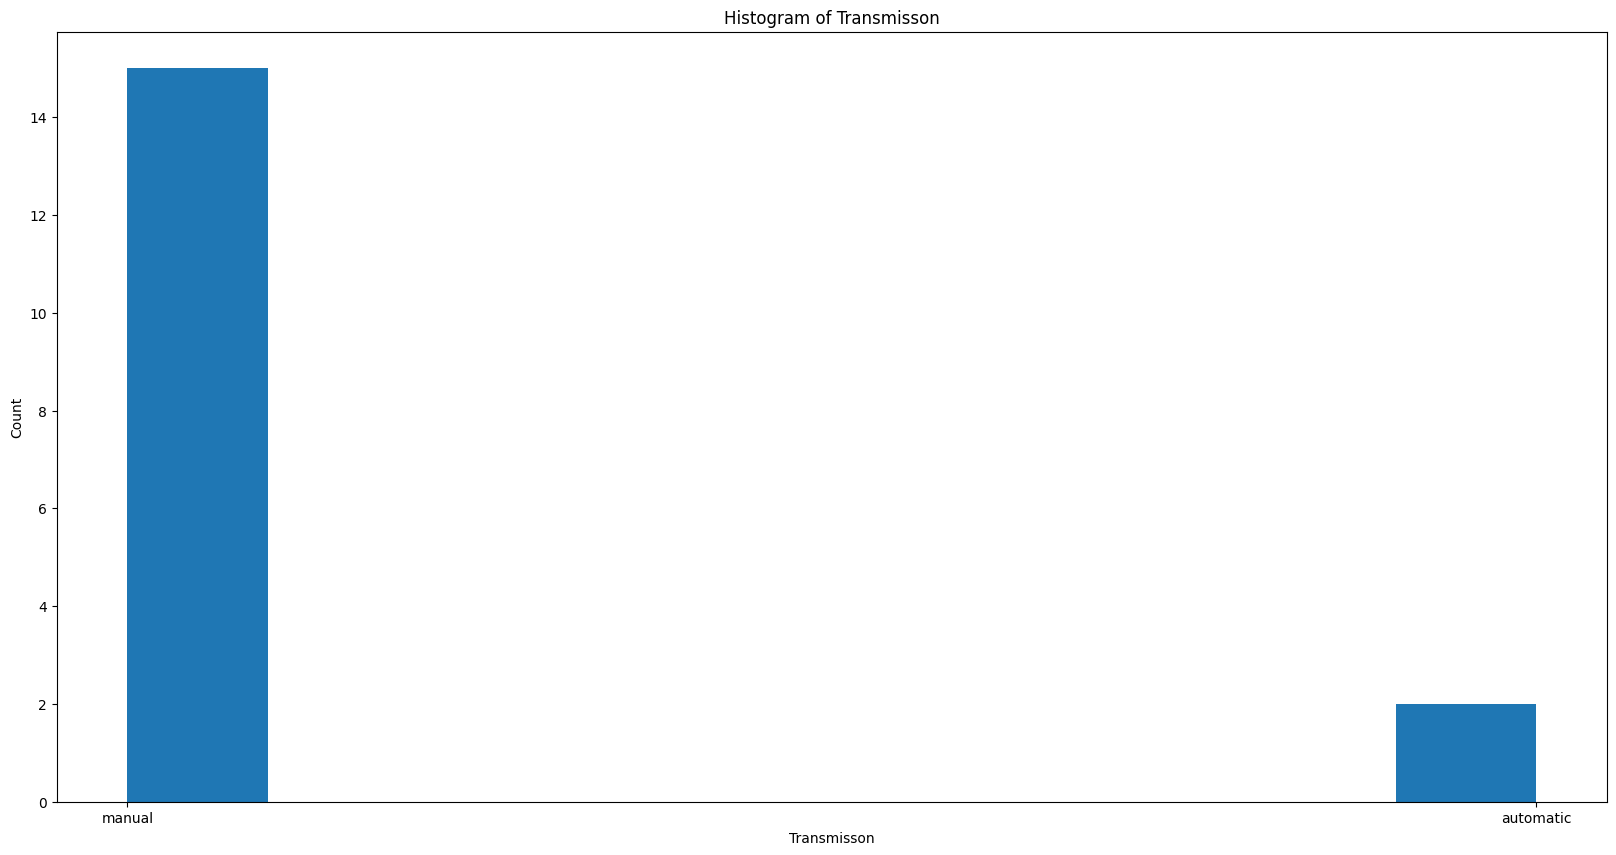

In [18]:
for col in categorical_cols:
    plt.figure(figsize=(20, 10))
    plt.hist(df[col])
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Histogram of {col}')
    plt.show()
